<a href="https://colab.research.google.com/github/firaolkiya/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions/blob/main/notebooks/eda_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

**READ FILE**

In [4]:
dff = pd.read_csv('/content/Fraud_Data.csv', engine='python')
dfi = pd.read_csv('/content/IpAddress_to_Country.csv', engine='python')
dfc = pd.read_csv('/content/creditcard.csv', engine='python')

In [3]:

print("Fraud data.....................................")
dff.head(10)

Fraud data.....................................


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


**Handle missing values**

In [5]:
def check_missing_values(df,tag):
    print("Missing values in ",tag)
    missing_values = df.isnull().sum()
    print(missing_values)
    print("============================================================================")

In [6]:
check_missing_values(dff,"Fraud data")
check_missing_values(dfi,"Ip data")
check_missing_values(dfc,"Credit card data")

Missing values in  Fraud data
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values in  Ip data
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Missing values in  Credit card data
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
dfc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
dfi.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


**Remove Duplicates**

In [9]:

print("Original dataframe shape (dff):", dff.shape)
dff_duplicates = dff.duplicated().sum()
print("Number of duplicate rows in dff:", dff_duplicates)
if dff_duplicates > 0:
    dff = dff.drop_duplicates()
    print("Shape of dff after removing duplicates:", dff.shape)

print("Original dataframe shape (dfi):", dfi.shape)
dfi_duplicates = dfi.duplicated().sum()
print("Number of duplicate rows in dfi:", dfi_duplicates)
if dfi_duplicates > 0:
    dfi = dfi.drop_duplicates()
    print("Shape of dfi after removing duplicates:", dfi.shape)

print("Original dataframe shape (dfc):", dfc.shape)
dfc_duplicates = dfc.duplicated().sum()
print("Number of duplicate rows in dfc:", dfc_duplicates)
if dfc_duplicates > 0:
    dfc = dfc.drop_duplicates()
    print("Shape of dfc after removing duplicates:", dfc.shape)

Original dataframe shape (dff): (151112, 11)
Number of duplicate rows in dff: 0
Original dataframe shape (dfi): (138846, 3)
Number of duplicate rows in dfi: 0
Original dataframe shape (dfc): (284807, 31)
Number of duplicate rows in dfc: 1081
Shape of dfc after removing duplicates: (283726, 31)


In [10]:

# **Correct Data Types**

# Convert 'signup_time' and 'purchase_time' in dff to datetime objects
dff['signup_time'] = pd.to_datetime(dff['signup_time'])
dff['purchase_time'] = pd.to_datetime(dff['purchase_time'])

# Convert 'Timestamp' in dfc to datetime objects
dfc['Time'] = pd.to_datetime(dfc['Time'], unit='s')

print("\nData types after conversion (dff):")
print(dff.info())

print("\nData types after conversion (dfc):")
print(dfc.info())

print("\nData types after conversion (dfi):")
print(dfi.info()) # No datetime conversions needed for dfi based on typical use cases



Data types after conversion (dff):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB
None

Data types after conversion (dfc):
<class 'pandas.core.frame.DataFrame'>
Ind

**Univariate analysis**


Univariate Analysis (dff):


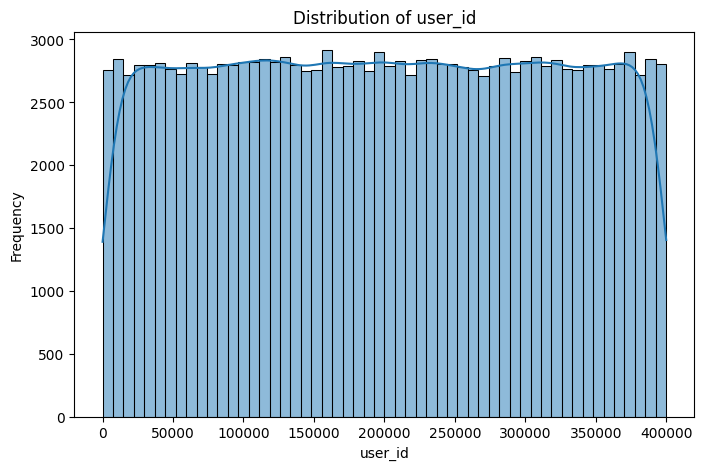

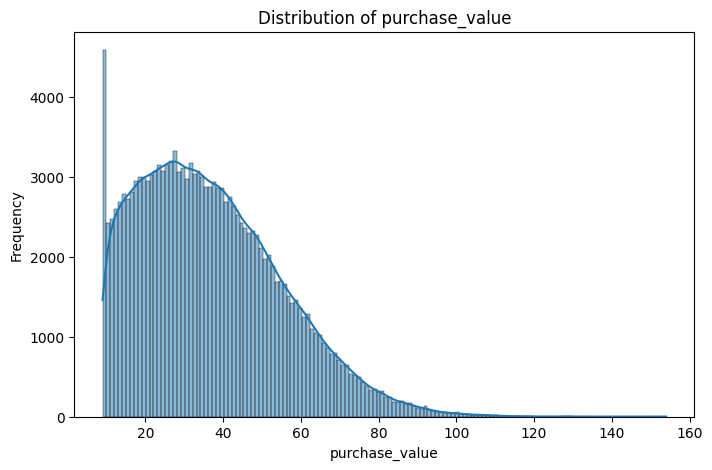

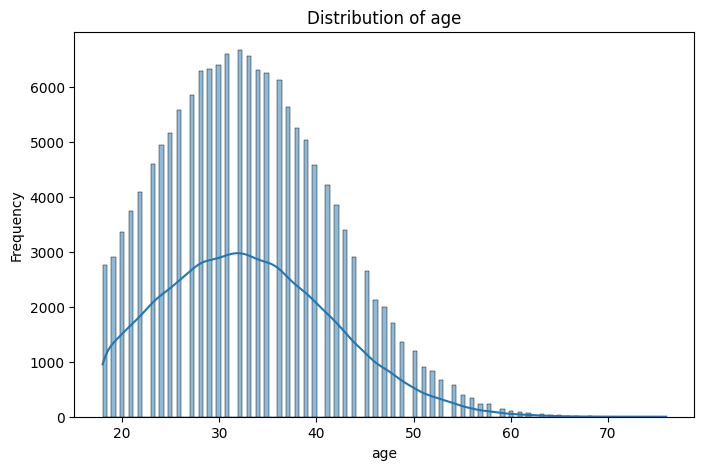

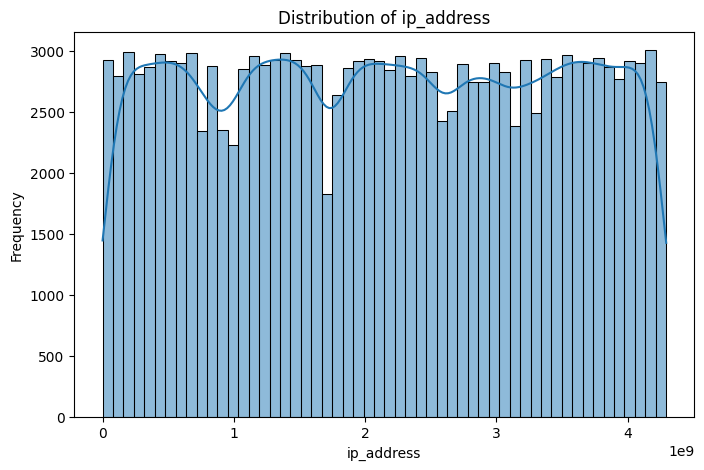

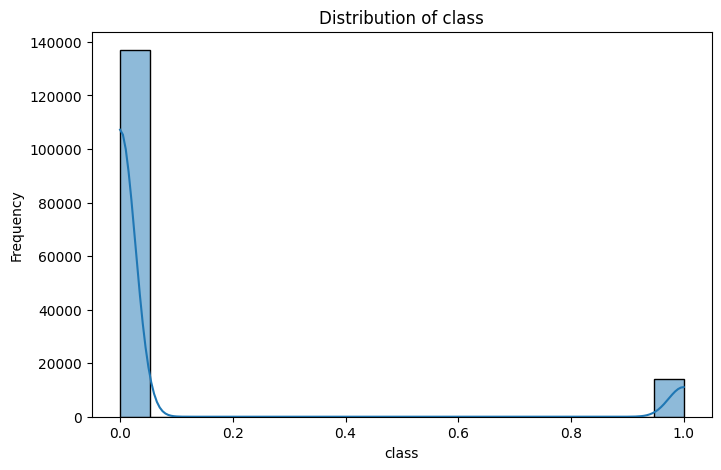

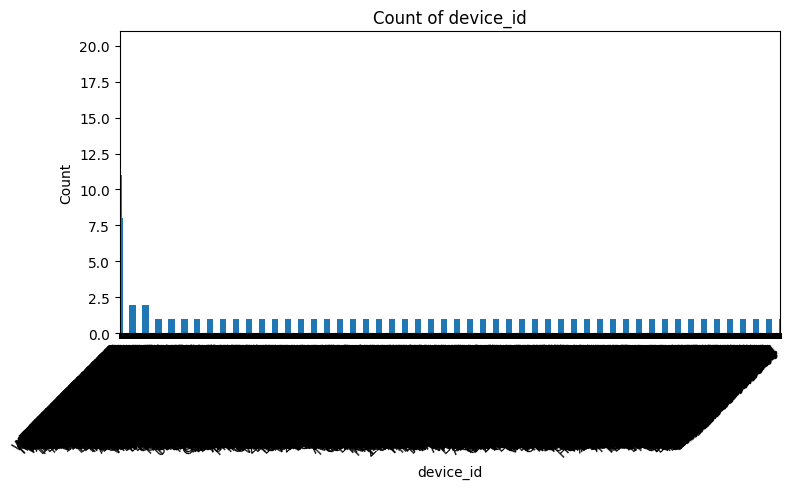

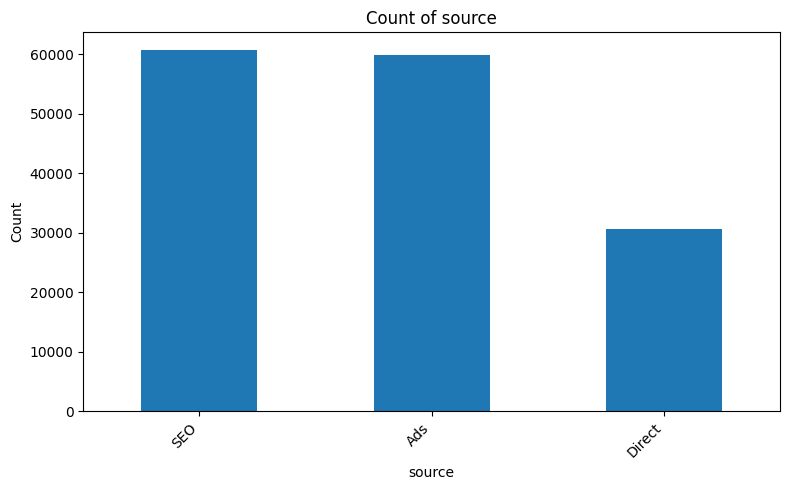

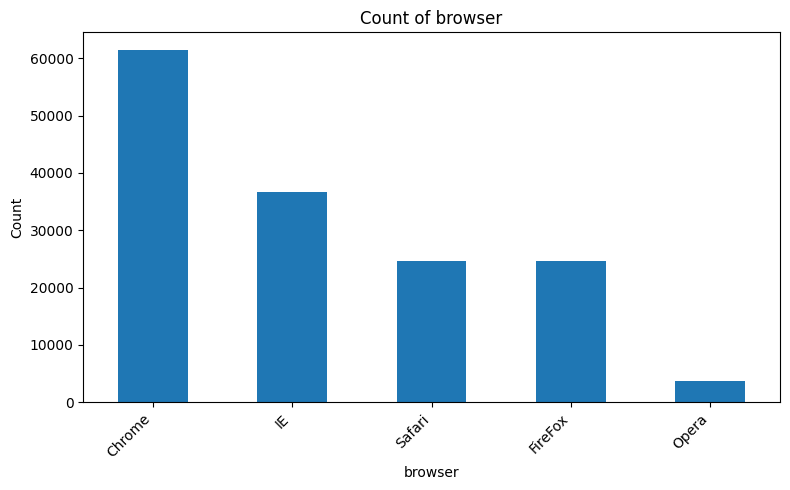

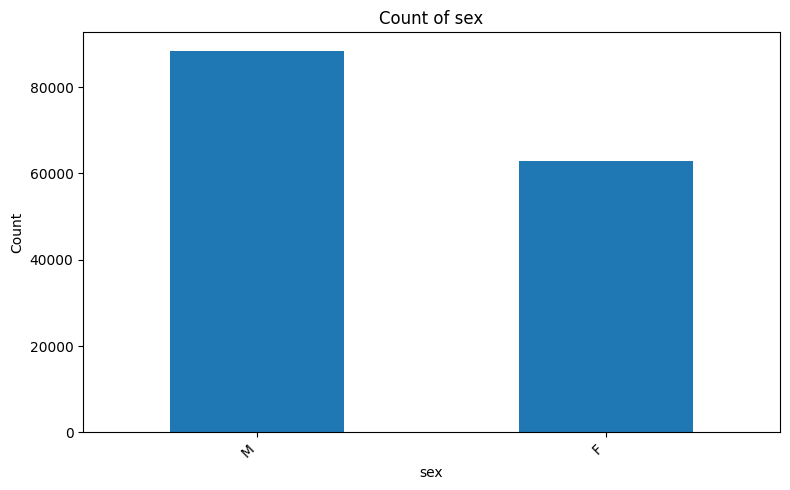


Univariate Analysis (dfc):


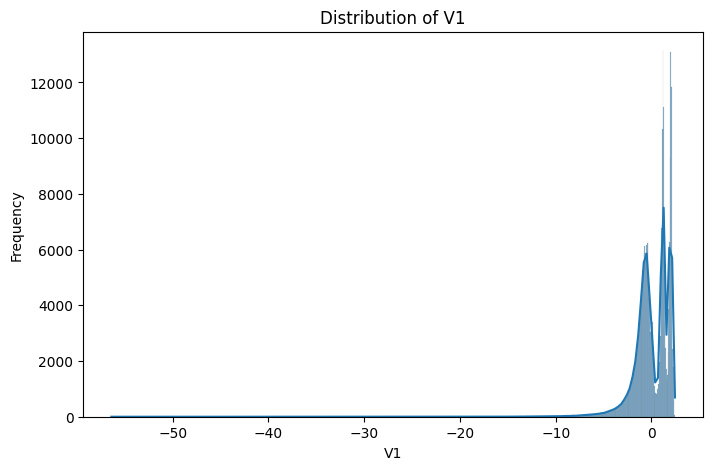

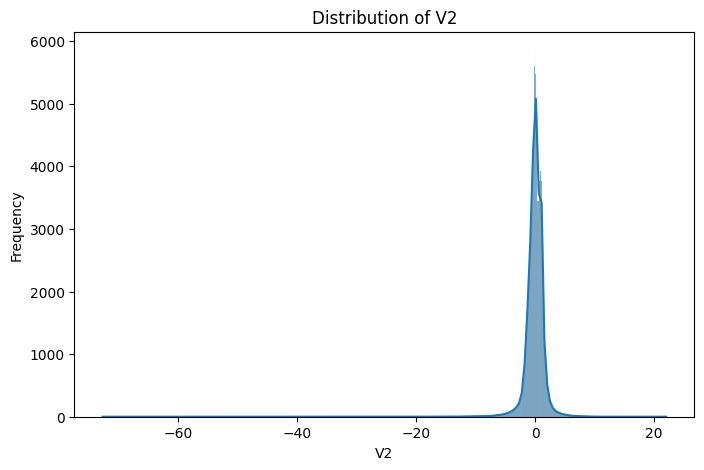

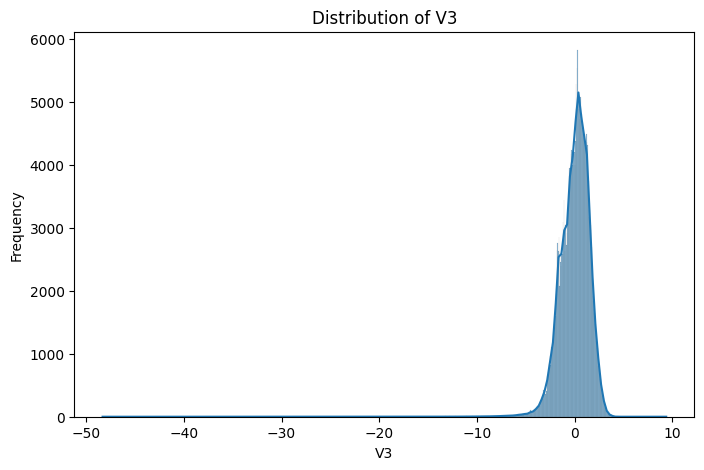

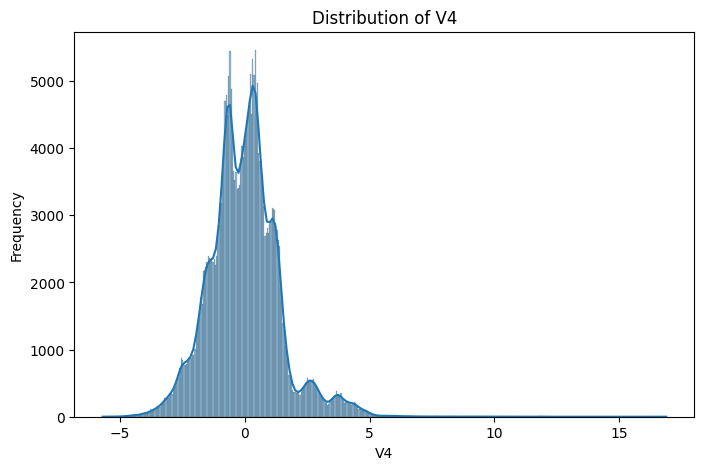

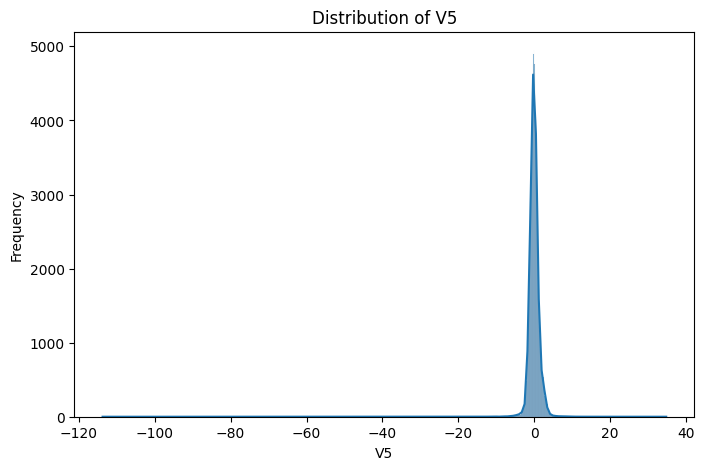

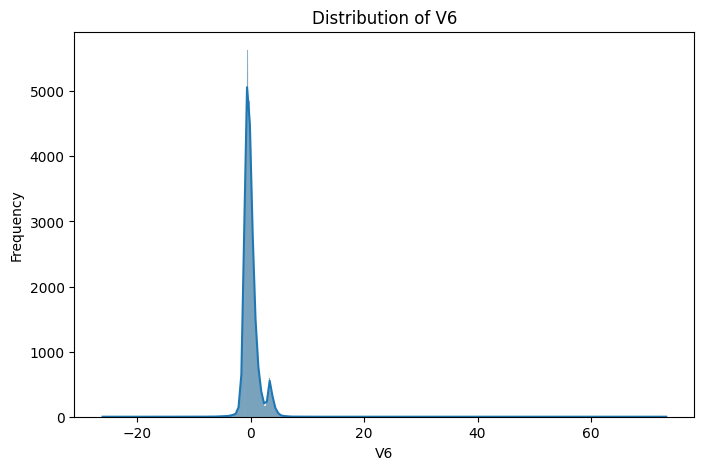

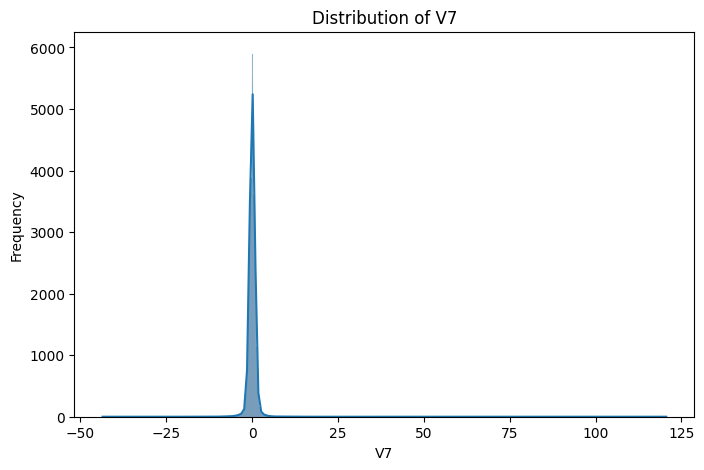

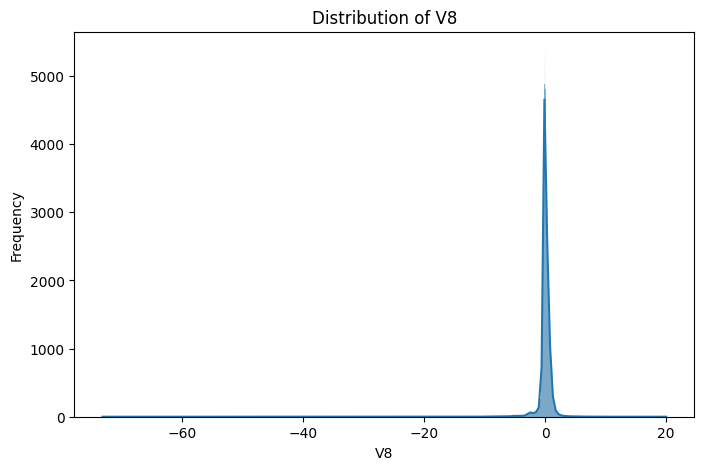

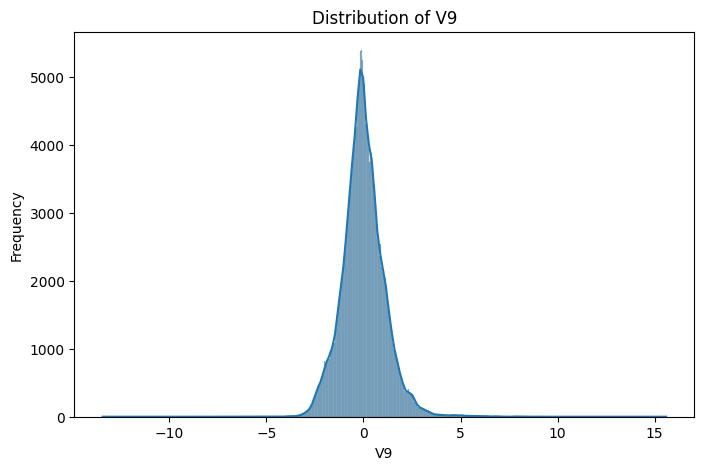

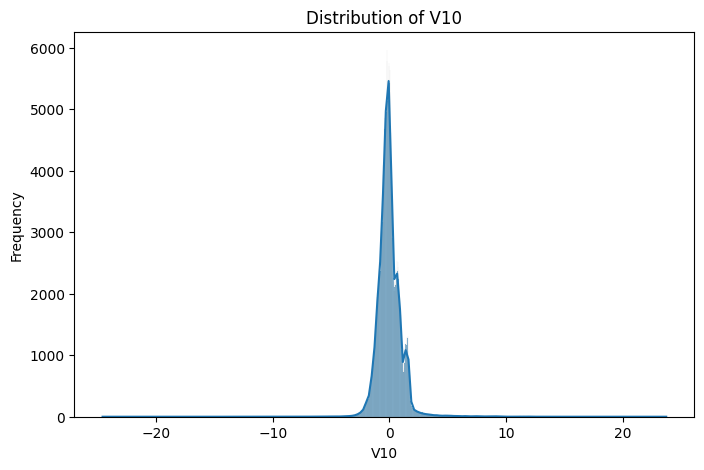

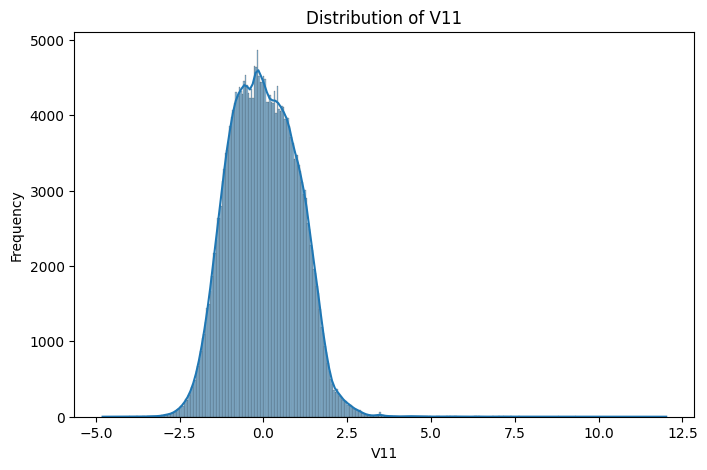

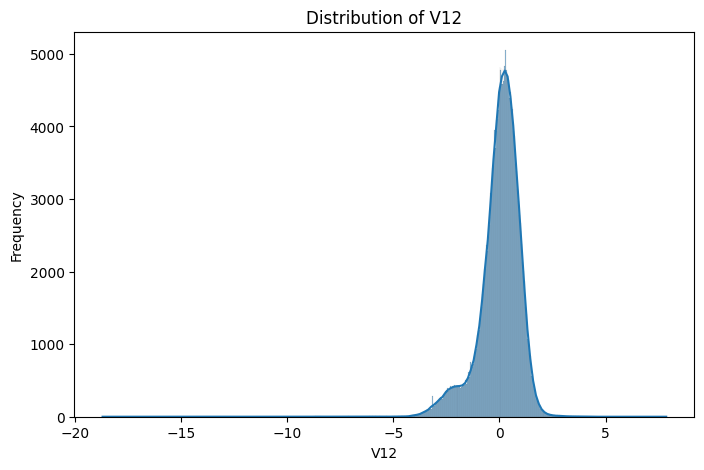

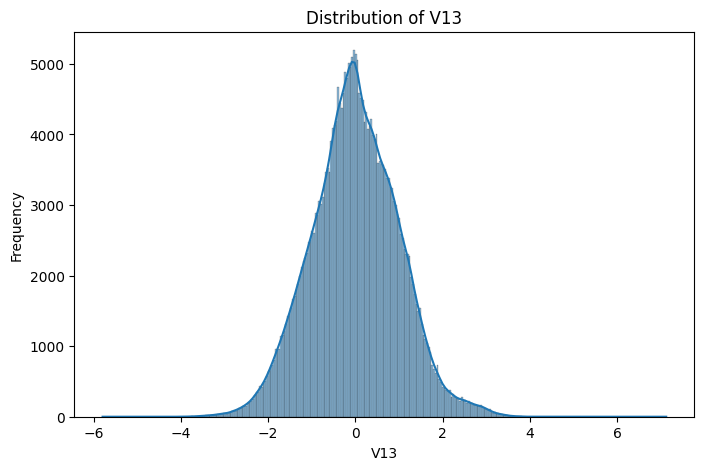

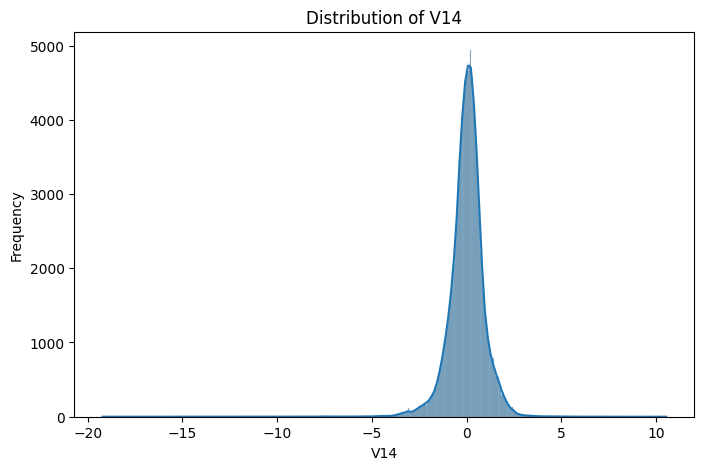

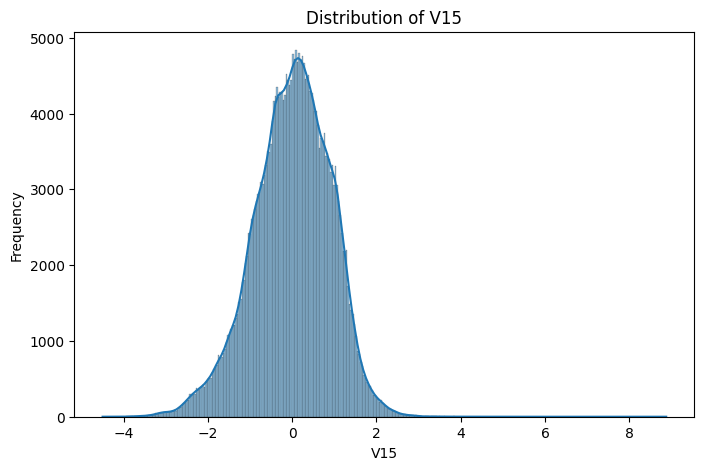

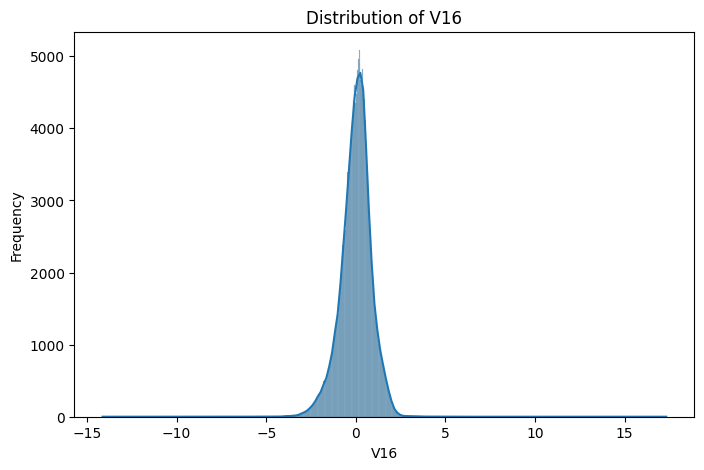

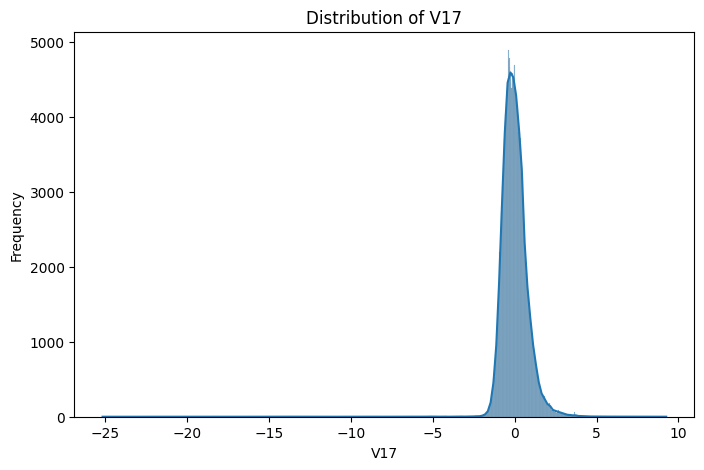

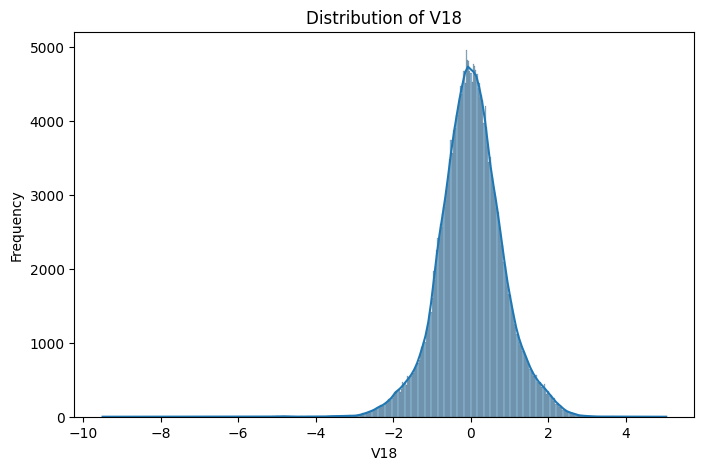

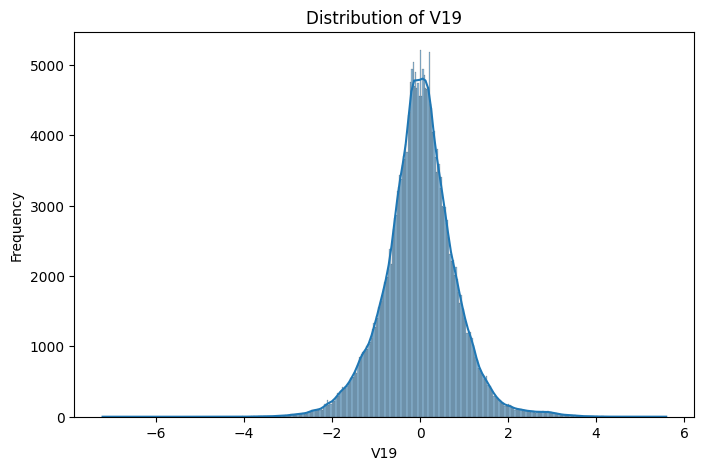

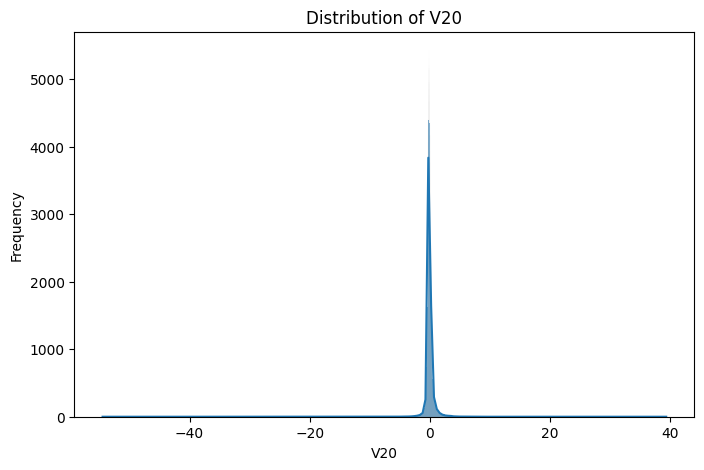

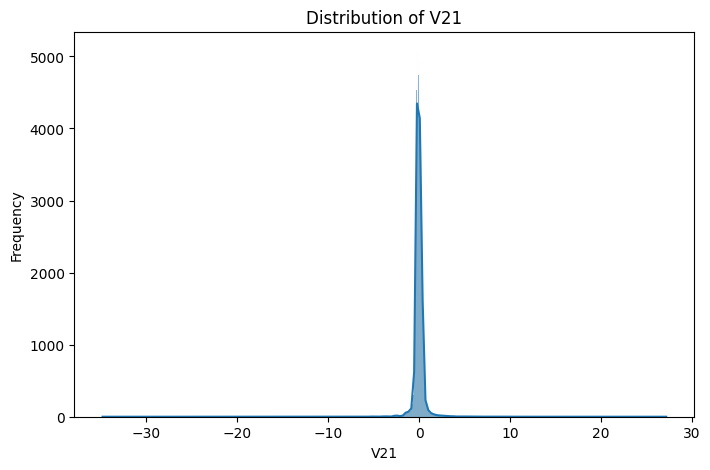

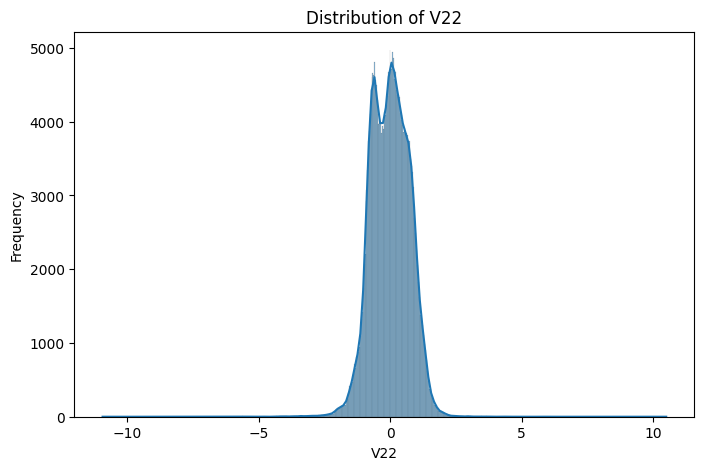

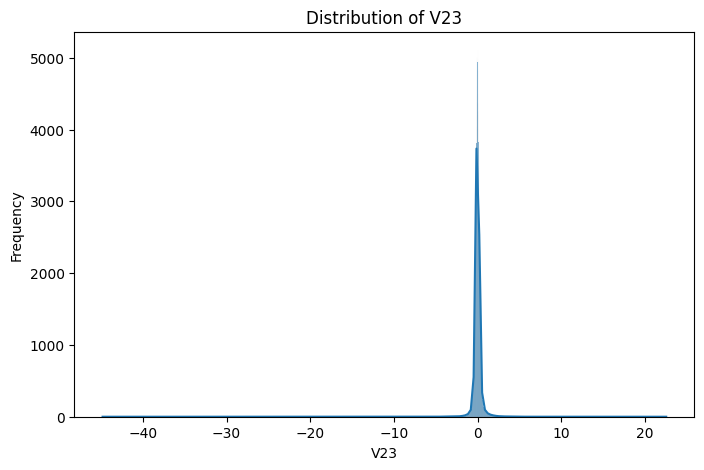

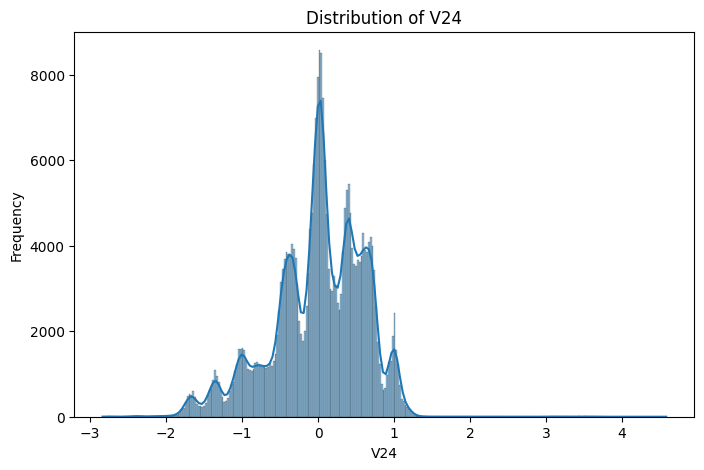

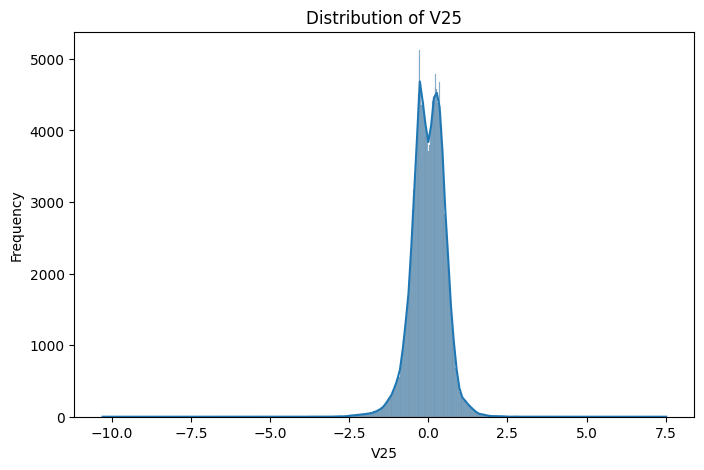

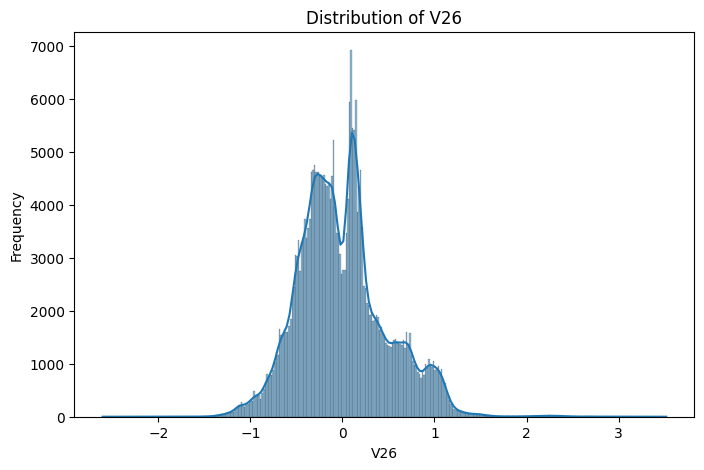

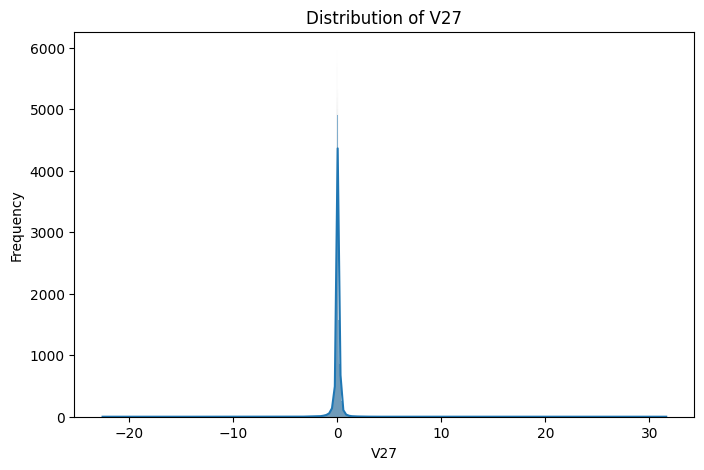

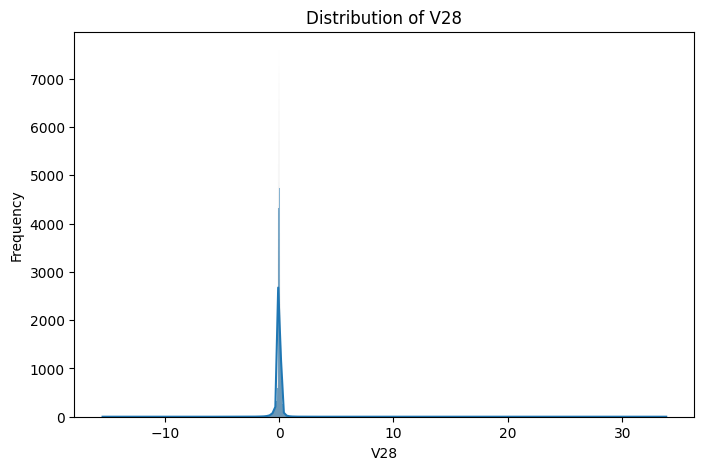

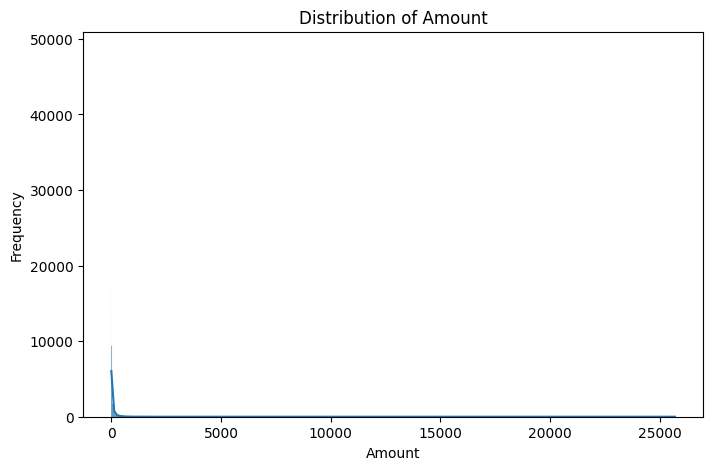

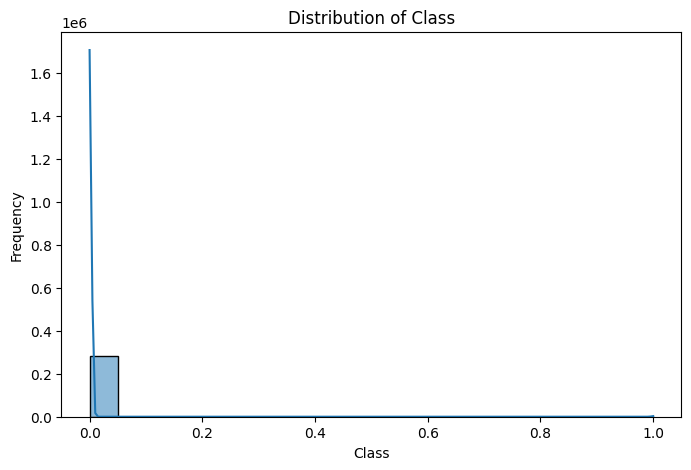


Univariate Analysis (dfi - Countries):


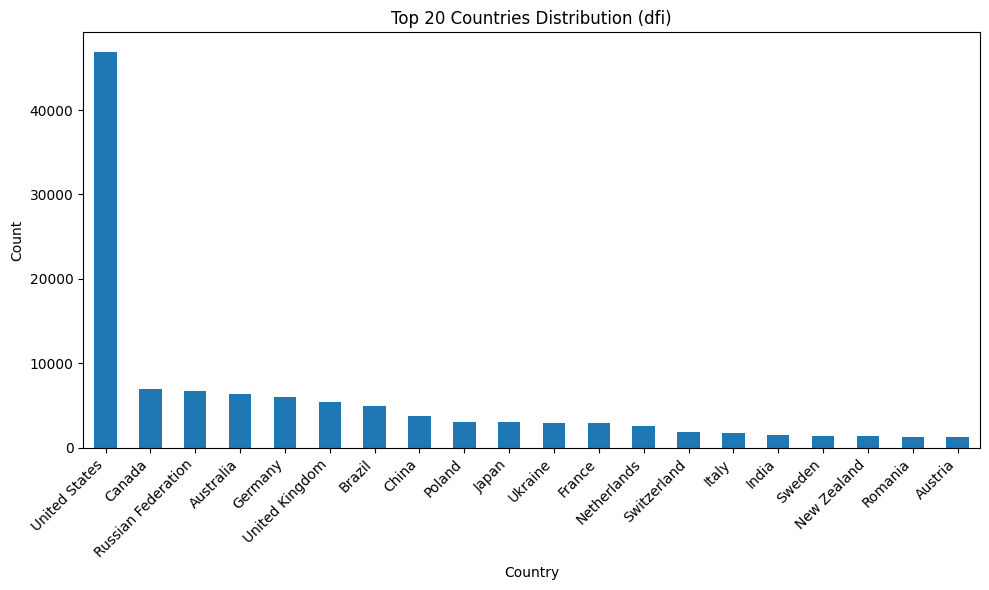

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

print("\nUnivariate Analysis (dff):")
numerical_cols_dff = dff.select_dtypes(include=np.number).columns
for col in numerical_cols_dff:
    plt.figure(figsize=(8, 5))
    sns.histplot(dff[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Univariate analysis for categorical columns in dff
categorical_cols_dff = dff.select_dtypes(include='object').columns
for col in categorical_cols_dff:
    plt.figure(figsize=(8, 5))
    dff[col].value_counts().plot(kind='bar')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Univariate analysis for numerical columns in dfc
print("\nUnivariate Analysis (dfc):")
numerical_cols_dfc = dfc.select_dtypes(include=np.number).columns
for col in numerical_cols_dfc:
    plt.figure(figsize=(8, 5))
    sns.histplot(dfc[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# direct univariate analysis with histograms might not be as meaningful
# unless we analyze the distribution of countries.
print("\nUnivariate Analysis (dfi - Countries):")
if 'country' in dfi.columns:
    plt.figure(figsize=(10, 6))
    dfi['country'].value_counts().nlargest(20).plot(kind='bar') # Top 20 countries
    plt.title('Top 20 Countries Distribution (dfi)')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:

# Relationship between `purchase_value` and `age`
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dff, x='age', y='purchase_value', alpha=0.5)
plt.title('Purchase Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Value')
plt.show()

# Relationship between `purchase_value` and `class` (assuming 'class' indicates fraud/non-fraud)
if 'class' in dff.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dff, x='class', y='purchase_value')
    plt.title('Purchase Value by Class (Fraud/Non-Fraud)')
    plt.xlabel('Class')
    plt.ylabel('Purchase Value')
    plt.show()

# Relationship between `signup_time` and `purchase_time` (Time difference)
dff['time_to_purchase'] = (dff['purchase_time'] - dff['signup_time']).dt.total_seconds() / 3600 # in hours
plt.figure(figsize=(10, 6))
sns.histplot(data=dff, x='time_to_purchase', bins=50, kde=True)
plt.title('Distribution of Time from Signup to Purchase')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.show()

# Relationship between `source` and `class`
if 'class' in dff.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dff, x='source', hue='class')
    plt.title('Fraud Count by Source')
    plt.xlabel('Source')
    plt.ylabel('Count')
    plt.show()

# Relationship between `browser` and `class`
if 'class' in dff.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dff, x='browser', hue='class')
    plt.title('Fraud Count by Browser')
    plt.xlabel('Browser')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Relationship between `sex` and `class`
if 'class' in dff.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dff, x='sex', hue='class')
    plt.title('Fraud Count by Sex')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.show()

# Bivariate Analysis for dfc (Credit Card Data)

# Relationship between `Amount` and `Class`
if 'Class' in dfc.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=dfc, x='Class', y='Amount')
    plt.title('Transaction Amount by Class (Fraud/Non-Fraud)')
    plt.xlabel('Class')
    plt.ylabel('Amount')
    plt.show()

# Relationship between `Time` and `Amount` (for both classes)
if 'Class' in dfc.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dfc, x='Time', y='Amount', hue='Class', alpha=0.5)
    plt.title('Transaction Amount over Time, by Class')
    plt.xlabel('Time')
    plt.ylabel('Amount')
    plt.show()

# Correlation matrix for numerical features in dfc
if 'Class' in dfc.columns:
    plt.figure(figsize=(12, 10))
    corr_matrix_dfc = dfc.drop('Time', axis=1).corr() # Exclude Time for direct correlation
    sns.heatmap(corr_matrix_dfc, cmap='coolwarm', linewidths=.5)
    plt.title('Correlation Matrix (Credit Card Data)')
    plt.show()

# Bivariate Analysis with dfi (Ip Address Data) - requires merging

# Assuming dfi has 'ip_address' and 'country' columns for a simple merge demonstration
# If not, this section needs adaptation based on the actual structure of dfi.
if 'ip_address' in dfi.columns and 'country' in dfi.columns:
    print("\nAttempting merge for Bivariate Analysis (dff and dfi)...")
    # This simple merge assumes dfi has a direct 'ip_address' column matching dff
    # If dfi has IP ranges, a different join/lookup logic is required.
    df_merged = pd.merge(dff, dfi[['ip_address', 'country']], on='ip_address', how='left')

    if 'class' in df_merged.columns:
        # Fraud rate by Country (Top 20 countries)
        country_fraud = df_merged.groupby('country')['class'].agg(['count', 'sum'])
        country_fraud['fraud_rate'] = country_fraud['sum'] / country_fraud['count']
        country_fraud_top20 = country_fraud.sort_values(by='fraud_rate', ascending=False).head(20)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=country_fraud_top20.index, y='fraud_rate', data=country_fraud_top20)
        plt.title('Top 20 Countries by Fraud Rate (dff and dfi)')
        plt.xlabel('Country')
        plt.ylabel('Fraud Rate')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Column 'class' not found in merged dataframe for fraud analysis.")
else:
    print("\nSkipping dfi bivariate analysis: dfi does not seem to have a direct 'ip_address' and 'country' column suitable for simple merge.")
    print("Bivariate analysis with dfi requires understanding its structure (IP ranges) and implementing appropriate lookup/merge logic.")

**Merge Datasets for Geolocation Analysis**


Mapping IP addresses to countries...
IP to country mapping complete.

Fraud data with merged country information:
   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age  ip_address  class  hour_of_day  \
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   732758368      0            2   
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53   350311387      0            1   
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2621473820      1           18   
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3840542443      0           13   
4  NAUITBZFJKHWW    Ads  Safari   M   45   415583117      0           18   

   day_

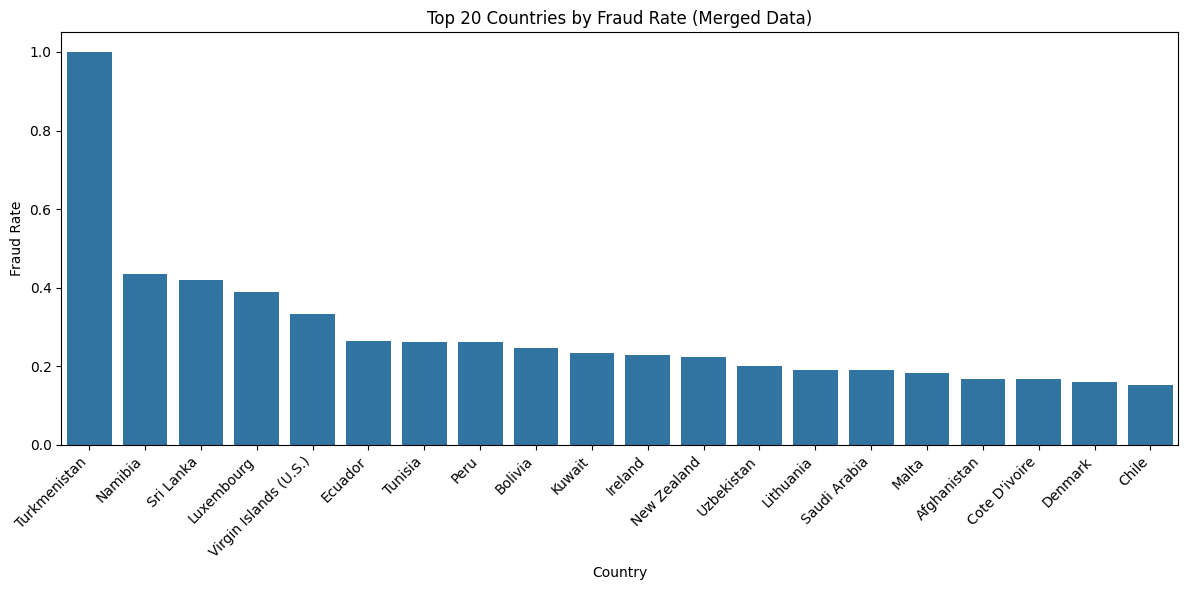

In [ ]:
# Function to convert an IP address string to an integer
def ip_to_int(ip_address):
    if pd.isnull(ip_address):
        return None
    try:
        # Convert the float IP address to an integer
        return int(ip_address)
    except:
        return None

# Apply the conversion function to the 'ip_address' column in dff
dff['ip_address'] = dff['ip_address'].apply(ip_to_int)

# Ensure dfi is sorted by 'lower_bound_ip_address' for efficient lookup
dfi = dfi.sort_values(by='lower_bound_ip_address').reset_index(drop=True)

# Function to find the country for a given IP integer
def find_country(ip_int):
    if pd.isnull(ip_int):
        return None
    # Use searchsorted to find the index where the ip_int would be inserted
    # The desired range would be in the row just before this insertion point.
    pos = dfi['lower_bound_ip_address'].searchsorted(ip_int, side='right') - 1

    # Check if the IP is within the range of the found row
    if pos >= 0 and pos < len(dfi) and ip_int >= dfi.loc[pos, 'lower_bound_ip_address'] and ip_int <= dfi.loc[pos, 'upper_bound_ip_address']:
        return dfi.loc[pos, 'country']
    else:
        return None

# Apply the lookup function to the integer IP addresses in dff
print("\nMapping IP addresses to countries...")
# More performant solutions exist (e.g., using numpy, specialized libraries, or database joins).
dff['country'] = dff['ip_address'].apply(find_country)
print("IP to country mapping complete.")

# Now dff has a 'country' column added from the merge/lookup
# Let's check the head of the merged data
print("\nFraud data with merged country information:")
print(dff.head())

# For example, analyzing fraud rates by country:
if 'class' in dff.columns:
    print("\nFraud rate by country (including merged data):")
    country_fraud = dff.groupby('country')['class'].agg(['count', 'sum'])
    # Handle cases where count might be 0 to avoid division by zero
    country_fraud['fraud_rate'] = country_fraud.apply(lambda row: row['sum'] / row['count'] if row['count'] > 0 else 0, axis=1)

    # Display top countries by fraud rate
    print(country_fraud.sort_values(by='fraud_rate', ascending=False).head())

    # Display top countries by fraud count
    print("\nTop countries by fraud count:")
    print(country_fraud.sort_values(by='sum', ascending=False).head())

    # Plotting fraud rate by country (Top N)
    country_fraud_top20 = country_fraud.sort_values(by='fraud_rate', ascending=False).head(20)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=country_fraud_top20.index, y='fraud_rate', data=country_fraud_top20)
    plt.title('Top 20 Countries by Fraud Rate (Merged Data)')
    plt.xlabel('Country')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

else:
     print("Column 'class' not found in dff for fraud analysis by country.")

**Feature Engineering**

In [13]:
# Extract hour of day from purchase_time
dff['hour_of_day'] = dff['purchase_time'].dt.hour

# Extract day of week from purchase_time
dff['day_of_week'] = dff['purchase_time'].dt.dayofweek # Monday=0, Sunday=6

# Calculate time since signup in hours
dff['time_since_signup'] = (dff['purchase_time'] - dff['signup_time']).dt.total_seconds() / 3600

# For simplicity, we'll set negative values to 0 or NaN. Choosing 0 here.
dff['time_since_signup'] = dff['time_since_signup'].apply(lambda x: max(0, x))

# Count transactions per user_id
user_transaction_counts = dff.groupby('user_id').size().reset_index(name='transaction_frequency')
dff = pd.merge(dff, user_transaction_counts, on='user_id', how='left')

# Display the first few rows with new features
print("\nFraud data with new features:")
print(dff[['user_id', 'signup_time', 'purchase_time', 'hour_of_day', 'day_of_week', 'time_since_signup']].head())

# Check distributions of new numerical features
print("\nDistribution of new numerical features:")
new_numerical_cols = ['hour_of_day', 'day_of_week', 'time_since_signup', 'transaction_frequency']



Fraud data with new features:
   user_id         signup_time       purchase_time  hour_of_day  day_of_week  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11            2            5   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54            1            0   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45           18            3   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50           13            0   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53           18            2   

   time_since_signup  
0        1251.856111  
1           4.984444  
2           0.000278  
3         136.690278  
4        1211.516944  

Distribution of new numerical features:


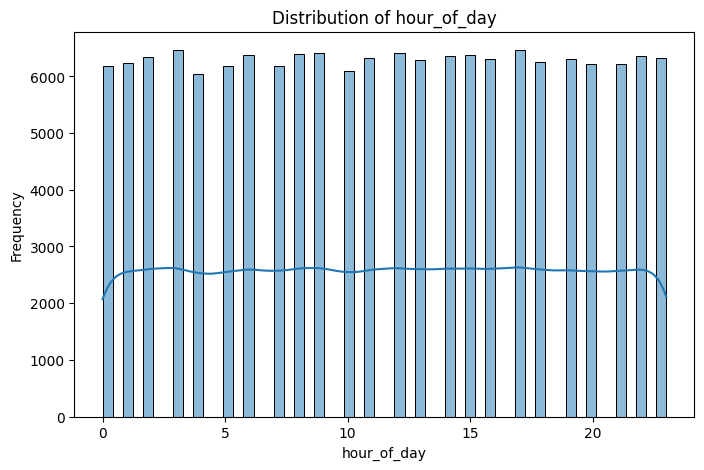

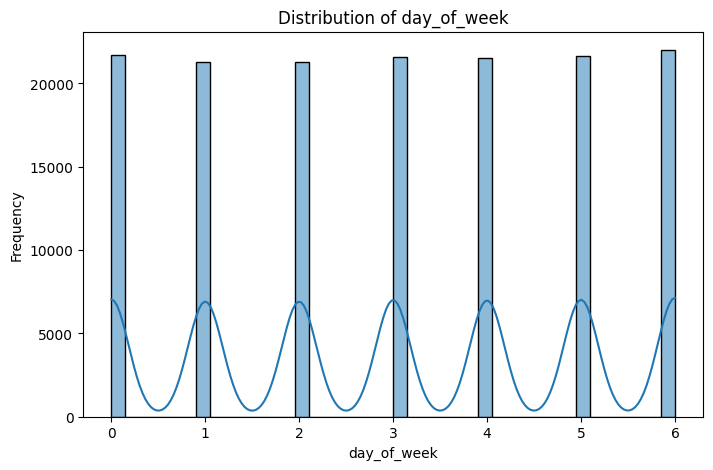

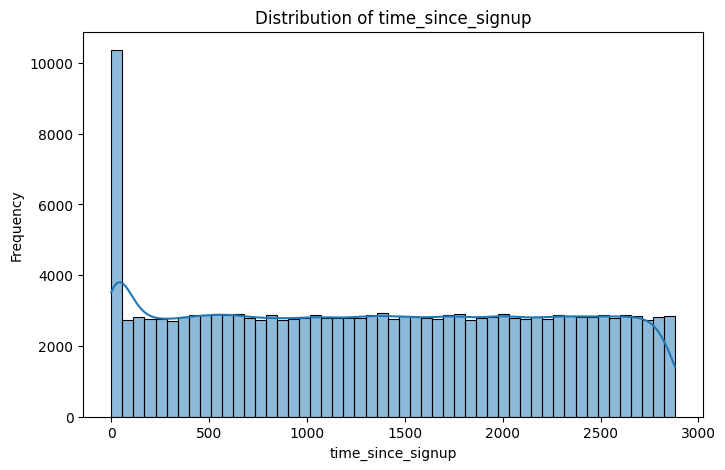

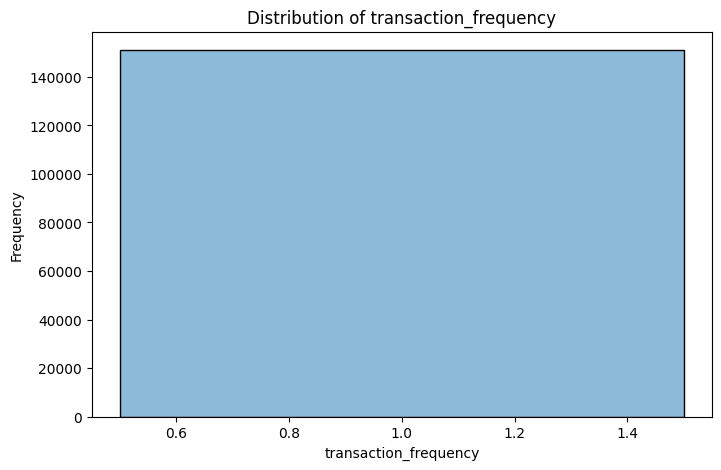


Analysis of new features vs. Class:


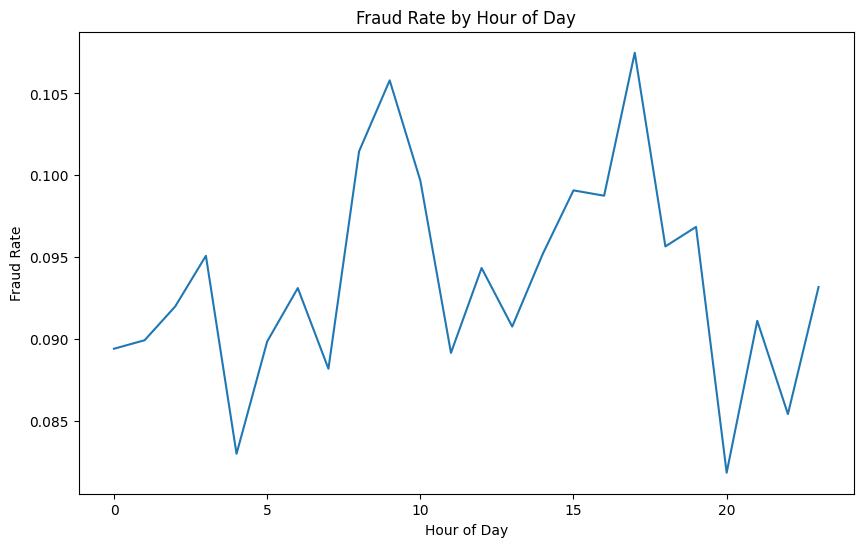

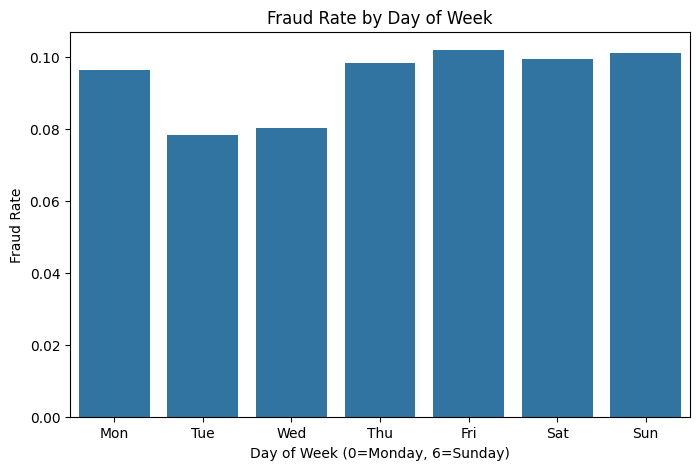

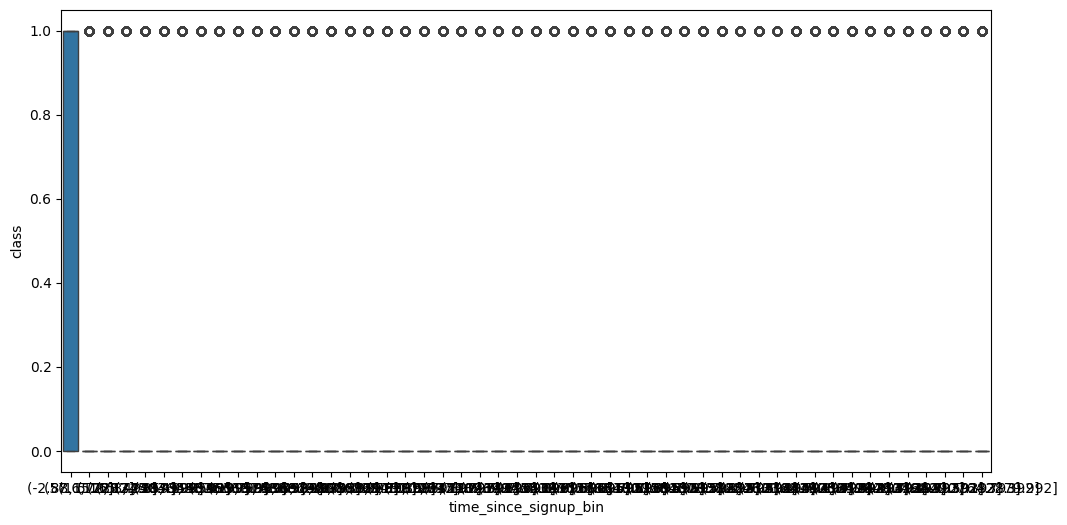

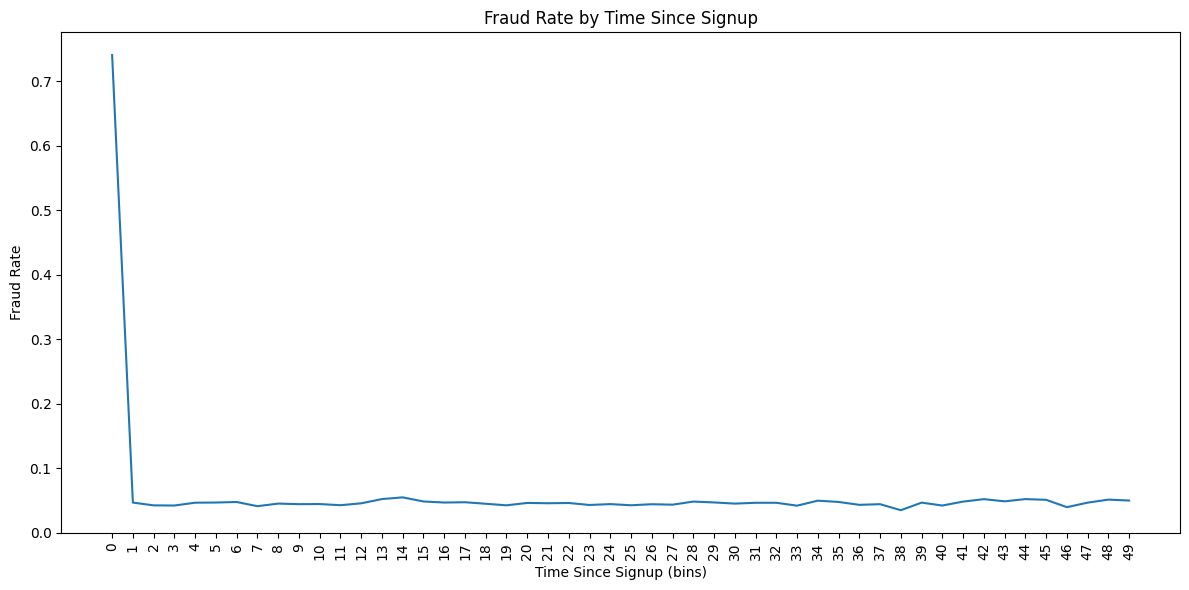

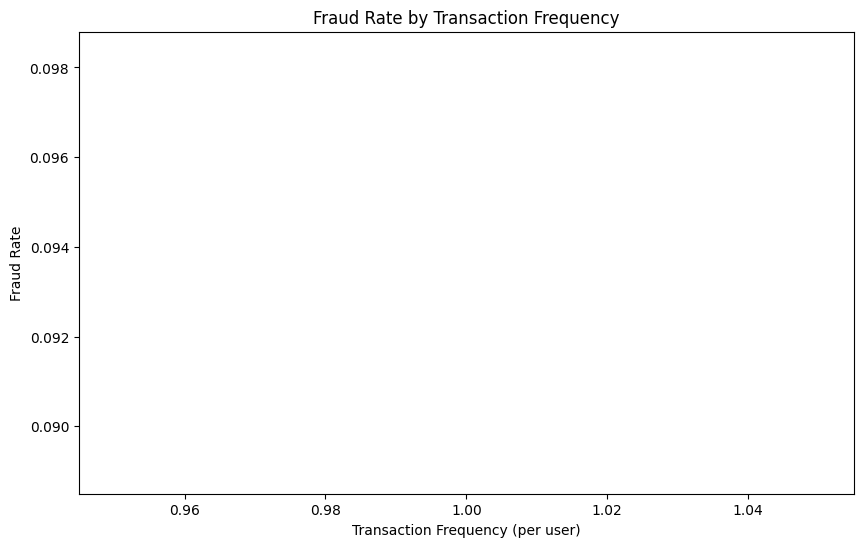

In [14]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import seaborn as sns # Import seaborn

for col in new_numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(dff[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Analyze relationship between new features and 'class' (if 'class' exists)
if 'class' in dff.columns:
    print("\nAnalysis of new features vs. Class:")

    # Hour of day vs. Fraud Rate
    plt.figure(figsize=(10, 6))
    hourly_fraud_rate = dff.groupby('hour_of_day')['class'].mean().reset_index(name='fraud_rate')
    sns.lineplot(data=hourly_fraud_rate, x='hour_of_day', y='fraud_rate')
    plt.title('Fraud Rate by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Fraud Rate')
    plt.show()

    # Day of week vs. Fraud Rate
    plt.figure(figsize=(8, 5))
    daily_fraud_rate = dff.groupby('day_of_week')['class'].mean().reset_index(name='fraud_rate')
    sns.barplot(data=daily_fraud_rate, x='day_of_week', y='fraud_rate')
    plt.title('Fraud Rate by Day of Week')
    plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
    plt.ylabel('Fraud Rate')
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()

    # Time since signup vs. Fraud (e.g., split into bins)
    dff['time_since_signup_bin'] = pd.cut(dff['time_since_signup'], bins=50) # Adjust bins as needed
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=dff, x='time_since_signup_bin', y='class') # Boxplot might not be ideal with bins and class
    # Alternative: Fraud rate by time_since_signup bins
    time_bin_fraud_rate = dff.groupby('time_since_signup_bin', observed=True)['class'].mean().reset_index(name='fraud_rate')
    plt.figure(figsize=(12, 6))
    plt.plot(time_bin_fraud_rate.index.astype(str), time_bin_fraud_rate['fraud_rate']) # Plotting against bin labels
    plt.title('Fraud Rate by Time Since Signup')
    plt.xlabel('Time Since Signup (bins)')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Transaction frequency vs. Fraud
    plt.figure(figsize=(10, 6))
    freq_fraud_rate = dff.groupby('transaction_frequency')['class'].mean().reset_index(name='fraud_rate')
    sns.lineplot(data=freq_fraud_rate, x='transaction_frequency', y='fraud_rate')
    plt.title('Fraud Rate by Transaction Frequency')
    plt.xlabel('Transaction Frequency (per user)')
    plt.ylabel('Fraud Rate')
    plt.show()

else:
    print("\nColumn 'class' not found in dff. Skipping fraud analysis for new features.")

In [15]:
print(dfi.columns)

Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')


In [ ]:

# Handle Class Imbalance (using SMOTE on training data)

if 'class' in dff.columns:
    print("\nOriginal class distribution in dff:")
    print(dff['class'].value_counts())
    print("\nOriginal class distribution percentage:")
    print(dff['class'].value_counts(normalize=True) * 100)

    # Assume 'class' is the target variable. Separate features (X) and target (y)
    X = dff.drop('class', axis=1)
    y = dff['class']

    # SMOTE works on numerical data. We need to encode categorical features.
    categorical_features = X.select_dtypes(include=['object']).columns

    # Perform one-hot encoding on categorical features
    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

    # Drop datetime columns and the original ip_address as they are not suitable for SMOTE
    # and we've used ip_address_int and country.
    # Also drop the ip_address_int and time_since_signup_bin as we have numerical alternatives
    # and they might not be directly usable by SMOTE or are intermediary features.
    X = X.drop(['signup_time', 'purchase_time', 'ip_address', 'ip_address_int', 'time_since_signup_bin'], axis=1, errors='ignore')

    # Before applying SMOTE, it's common practice to split the data into training and testing sets
    # to prevent data leakage (oversampling the test set).
    from sklearn.model_selection import train_test_split

    # Split the data into training (e.g., 70%) and testing (e.g., 30%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print("\nTraining data class distribution before resampling:")
    print(y_train.value_counts())
    print("\nTraining data class distribution percentage before resampling:")
    print(y_train.value_counts(normalize=True) * 100)

    # Install imbalanced-learn if not already installed
    try:
        from imblearn.over_sampling import SMOTE
        print("\nimbalanced-learn library found.")
    except ImportError:
        print("\nimbalanced-learn not found. Installing...")
        !pip install imbalanced-learn
        from imblearn.over_sampling import SMOTE
        print("imbalanced-learn installed and imported.")

    # Apply SMOTE to the training data only
    # We will resample the minority class ('1') to be equal to the majority class ('0')
    smote = SMOTE(random_state=42)

    print("\nApplying SMOTE to the training data...")
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("SMOTE resampling complete.")

    print("\nTraining data class distribution after SMOTE resampling:")
    print(y_train_resampled.value_counts())
    print("\nTraining data class distribution percentage after SMOTE resampling:")
    print(y_train_resampled.value_counts(normalize=True) * 100)

    print("\nTest data shape (not resampled):")
    print(X_test.shape)
    print("\nTest data class distribution (not resampled):")
    print(y_test.value_counts())


    # You now have X_train_resampled, y_train_resampled for training your model
    # and X_test, y_test for evaluating your model.

elif 'Class' in dfc.columns:
    # Handle class imbalance for dfc if 'class' isn't in dff
    print("\nOriginal class distribution in dfc:")
    print(dfc['Class'].value_counts())
    print("\nOriginal class distribution percentage:")
    print(dfc['Class'].value_counts(normalize=True) * 100)

    # Assume 'Class' is the target variable in dfc
    Xc = dfc.drop('Class', axis=1)
    yc = dfc['Class']

    # Drop datetime column 'Time' as it's not suitable for SMOTE directly
    Xc = Xc.drop('Time', axis=1, errors='ignore')

    # Split the data into training (e.g., 70%) and testing (e.g., 30%)
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(Xc, yc, test_size=0.3, random_state=42, stratify=yc)

    print("\nTraining data class distribution before resampling (dfc):")
    print(y_train_c.value_counts())
    print("\nTraining data class distribution percentage before resampling (dfc):")
    print(y_train_c.value_counts(normalize=True) * 100)

    # Install imbalanced-learn if not already installed
    try:
        from imblearn.over_sampling import SMOTE
        print("\nimbalanced-learn library found.")
    except ImportError:
        print("\nimbalanced-learn not found. Installing...")
        !pip install imbalanced-learn
        from imblearn.over_sampling import SMOTE
        print("imbalanced-learn installed and imported.")

    # Apply SMOTE to the training data only for dfc
    smote_c = SMOTE(random_state=42)

    print("\nApplying SMOTE to the training data (dfc)...")
    X_train_resampled_c, y_train_resampled_c = smote_c.fit_resample(X_train_c, y_train_c)
    print("SMOTE resampling complete (dfc).")

    print("\nTraining data class distribution after SMOTE resampling (dfc):")
    print(y_train_resampled_c.value_counts())
    print("\nTraining data class distribution percentage after SMOTE resampling (dfc):")
    print(y_train_resampled_c.value_counts(normalize=True) * 100)

    print("\nTest data shape (not resampled, dfc):")
    print(X_test_c.shape)
    print("\nTest data class distribution (not resampled, dfc):")
    print(y_test_c.value_counts())

    # You now have X_train_resampled_c, y_train_resampled_c for training your model for dfc
    # and X_test_c, y_test_c for evaluating your model for dfc.


else:

    print("\nNeither 'class' column found in dff nor 'Class' column found in dfc. Cannot perform class imbalance handling.")




Original class distribution in dff:
class
0    136961
1     14151
Name: count, dtype: int64

Original class distribution percentage:
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64
